In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [2]:
# Renaming column
df = pd.read_csv('mall customers.csv',names=['CustomerID', 'Gender', 'Age', 'Income', 'Score'], skiprows=1) 
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Droping CustomerID
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
# Converting Categorical Data to numerical
dummies =  pd.get_dummies(df['Gender'],drop_first=True,prefix='Gender')#dummy varibale trap
df = pd.concat([df,dummies],axis=1).drop('Gender',axis=1)


In [5]:
df.head()

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [6]:
# Correlation
df.corr()

,Age,Income,Score,Gender_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Income,-0.012398,1.000000,0.009903,0.056410
Score,-0.327227,0.009903,1.000000,-0.058109
Gender_Male,0.060867,0.056410,-0.058109,1.000000


<AxesSubplot:>

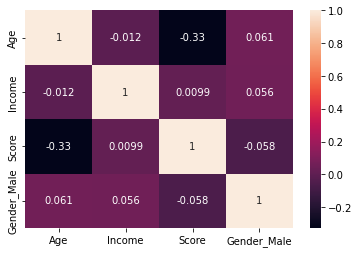

In [7]:
sns.heatmap(df.corr(), annot=True)

# Visualization

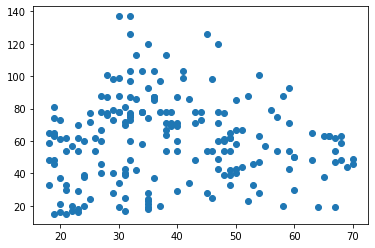

In [8]:
plt.scatter(df['Age'], df['Income'])

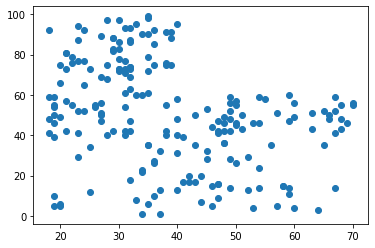

In [9]:
plt.scatter(df['Age'], df['Score'])

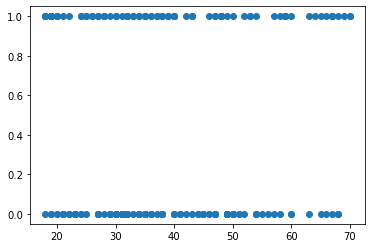

In [10]:
plt.scatter(df['Age'], df['Gender_Male'])

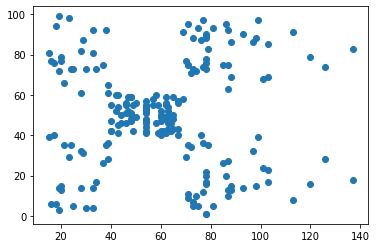

In [11]:
plt.scatter(df['Income'], df['Score'])

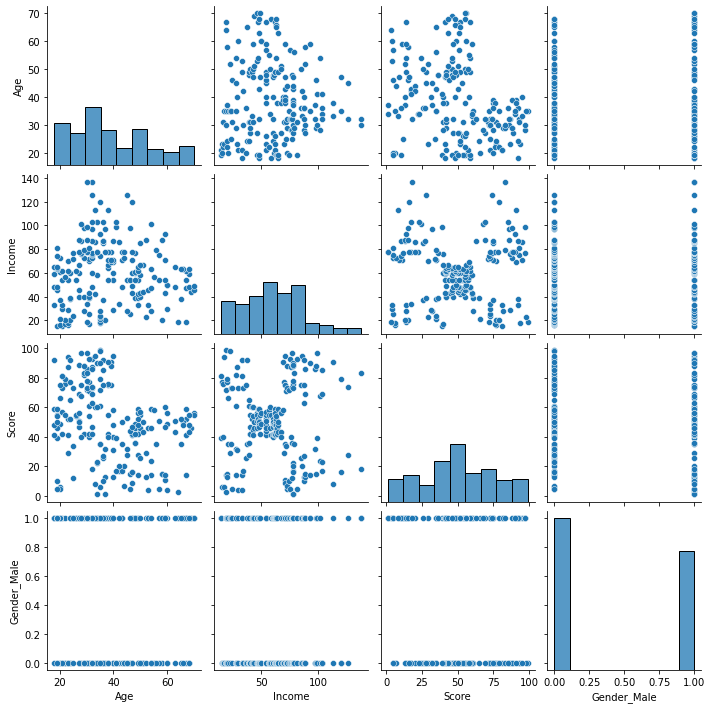

In [12]:
#pairplot
sns.pairplot(df[['Age', 'Income', 'Score', 'Gender_Male']])

# Default KMeans

In [13]:
import sklearn.cluster as cls

In [14]:
kmeans = cls.KMeans()

In [15]:
kmeans.fit(df[['Age', 'Income', 'Score', 'Gender_Male']])

KMeans()

In [16]:
# centroids
kmeans.cluster_centers_

array([[ 27.10810811,  56.2972973 ,  49.67567568,   0.35135135],
       [ 41.        , 109.7       ,  22.        ,   0.3       ],
       [ 32.86206897,  78.55172414,  82.17241379,   0.48275862],
       [ 56.34090909,  53.70454545,  49.38636364,   0.43181818],
       [ 25.27272727,  25.72727273,  79.36363636,   0.40909091],
       [ 44.31818182,  25.77272727,  20.27272727,   0.40909091],
       [ 41.23076923,  79.26923077,  15.92307692,   0.65384615],
       [ 32.2       , 109.7       ,  82.        ,   0.4       ]])

In [17]:
# prediction
df['clusters'] = kmeans.predict(df[['Age', 'Income', 'Score', 'Gender_Male']])
df.head()

,Age,Income,Score,Gender_Male,clusters
0,19,15,39,1,5
1,21,15,81,1,4
2,20,16,6,0,5
3,23,16,77,0,4
4,31,17,40,0,5


In [18]:
df0 = df[df['clusters'] == 0]
df1 = df[df['clusters'] == 1]
df2 = df[df['clusters'] == 2]
df3 = df[df['clusters'] == 3]
df4 = df[df['clusters'] == 4]
df5 = df[df['clusters'] == 5]
df6 = df[df['clusters'] == 6]
df7 = df[df['clusters'] == 7]

In [19]:
df.shape

(200, 5)

In [20]:
df0.shape

(37, 5)

In [21]:
df7.shape

(10, 5)

# Select Optimal Number of clusters

In [22]:
wcss = []
clusters = range(1,15)
for k in clusters:
    kmeans_tuned = cls.KMeans(n_clusters=k)
    kmeans_tuned.fit(df[['Age', 'Income', 'Score', 'Gender_Male']])
    wcss.append(kmeans_tuned.inertia_)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
wcss

[308862.06000000006,
 219911.5652173914,
 143391.59236035674,
 104422.83498539752,
 75399.61541401486,
 58348.64136331504,
 51165.184237107904,
 44389.80767355767,
 40903.932559549925,
 37868.46295572028,
 34583.23652597401,
 32555.555663780655,
 29939.621112530687,
 28211.635039096607]

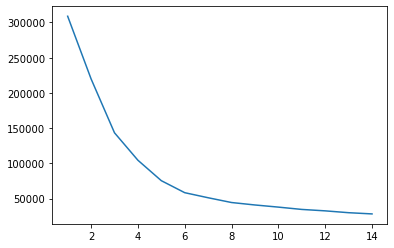

In [24]:
plt.plot(clusters, wcss)

In [25]:
!pip install kneed

In [26]:
from kneed import KneeLocator

In [27]:
kn = KneeLocator(clusters, wcss, curve = 'convex', direction = 'decreasing')

In [28]:
kn.knee

5

In [29]:
print('Optimal No of clusters:', kn.knee)

Optimal No of clusters: 5


# After Tuning

In [30]:
kmeans_optimal = cls.KMeans(n_clusters=kn.knee)

In [31]:
# fit and predict altogether
df['new_cluster'] = kmeans_optimal.fit_predict(df[['Age', 'Income', 'Score', 'Gender_Male']])
df

,Age,Income,Score,Gender_Male,clusters,new_cluster
0,19,15,39,1,5,4
1,21,15,81,1,4,3
2,20,16,6,0,5,4
3,23,16,77,0,4,3
4,31,17,40,0,5,4
...,...,...,...,...,...,...
195,35,120,79,0,7,0
196,45,126,28,0,1,2
197,32,126,74,1,7,0
198,32,137,18,1,1,2


In [32]:
centers_optimal = kmeans_optimal.cluster_centers_
centers_optimal

array([[32.69230769, 86.53846154, 82.12820513,  0.46153846],
       [43.08860759, 55.29113924, 49.56962025,  0.41772152],
       [40.66666667, 87.75      , 17.58333333,  0.52777778],
       [25.52173913, 26.30434783, 78.56521739,  0.39130435],
       [45.2173913 , 26.30434783, 20.91304348,  0.39130435]])